In [ ]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 35.0 MB/s 
     |████████████████████████████████| 233 kB 76.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools

import hashlib
def get_hash(num, significance = 4):
    num = round(num, significance)
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

### Causal Inference Using Observational Study 

In [ ]:
df = pd.read_csv('2020_US_Region_Mobility_Report.csv')

In [ ]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [ ]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"grocery_and_pharmacy_percent_change_from_baseline","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"sub_region_1","type":"nominal","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
#California and Iowa
cali_io = df.loc[df['sub_region_1'].isin(['California', 'Iowa'])]
sdo1 = cali_io.loc[cali_io['sub_region_1'] == 'California', 'grocery_and_pharmacy_percent_change_from_baseline'].mean() - cali_io.loc[cali_io['sub_region_1'] == 'Iowa', 'grocery_and_pharmacy_percent_change_from_baseline'].mean()
sdo1


-14.086592702118336

In [ ]:
#Texas and Iowa 
tx_io = df.loc[df['sub_region_1'].isin(['Texas', 'Iowa'])]
sdo2 = tx_io.loc[tx_io['sub_region_1'] == 'Texas', 'grocery_and_pharmacy_percent_change_from_baseline'].mean() - tx_io.loc[tx_io['sub_region_1'] == 'Iowa', 'grocery_and_pharmacy_percent_change_from_baseline'].mean()
sdo2

-12.94255953133381

In [ ]:
#Hawaii and Iowa 
hi_io = df.loc[df['sub_region_1'].isin(['Hawaii', 'Iowa'])]
sdo3 = hi_io.loc[hi_io['sub_region_1'] == 'Hawaii', 'grocery_and_pharmacy_percent_change_from_baseline'].mean() - hi_io.loc[hi_io['sub_region_1'] == 'Iowa', 'grocery_and_pharmacy_percent_change_from_baseline'].mean()
sdo3

-34.20182470555281

In [ ]:
#Utah and Colorado 
utah_col = df.loc[df['sub_region_1'].isin(['Utah', 'Colorado'])]
sdo4 = utah_col.loc[utah_col['sub_region_1'] == 'Colorado', 'grocery_and_pharmacy_percent_change_from_baseline'].mean() - utah_col.loc[utah_col['sub_region_1'] == 'Utah', 'grocery_and_pharmacy_percent_change_from_baseline'].mean()
sdo4

-9.177564767552546

In [ ]:
#Alabama and Georgia 
ala_georgia = df.loc[df['sub_region_1'].isin(['Alabama', 'Georgia'])]
sdo5 = ala_georgia.loc[ala_georgia['sub_region_1'] == 'Alabama', 'grocery_and_pharmacy_percent_change_from_baseline'].mean() - ala_georgia.loc[ala_georgia['sub_region_1'] == 'Georgia', 'grocery_and_pharmacy_percent_change_from_baseline'].mean()
sdo5

1.1633092017956719

In [ ]:
c = {'Averages': [sdo1, sdo2, sdo3, sdo4, sdo5]}
avgs = pd.DataFrame(c)
avgs

,Averages
0,-14.086593
1,-12.942560
2,-34.201825
3,-9.177565
4,1.163309


<AxesSubplot:xlabel='grocery_and_pharmacy_percent_change_from_baseline', ylabel='Density'>

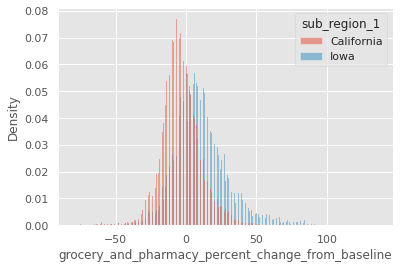

In [ ]:
sns.histplot(data = cali_io, x='grocery_and_pharmacy_percent_change_from_baseline', hue = 'sub_region_1', stat='density', binwidth=0.5, common_norm=False)

<AxesSubplot:xlabel='grocery_and_pharmacy_percent_change_from_baseline', ylabel='Density'>

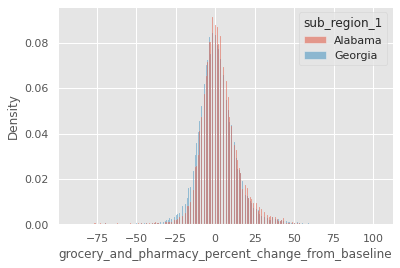

In [ ]:
sns.histplot(data = ala_georgia, x='grocery_and_pharmacy_percent_change_from_baseline', hue = 'sub_region_1', stat='density', binwidth=0.5, common_norm=False)

• Results

– Summarize and interpret your results, providing a clear statement about causality (or a lack thereof) including any assumptions necessary.

For this question we worked with the covid mobility dataset which only looks at the year 2020 (when the pandemic began). We conducted observational studies as a method of causal inference for different pairs of states at a particular location. We observed the causal effect of two states (state as the treatment variable) on grocery store mobility during the pandemic. Looking at the states of California and Iowa, we observed that there was about 14.09 percent less mobility in California than in Iowa in the year 2020. From the histogram we can see that the distribution of grocery store mobility is different for California than it is for Iowa. The distribution for California is shifted to the left in comparison with Iowa, since California’s percent change from baseline is on average lower than Iowa’s. Therefore, the pandemic had a causal effect on human mobility to grocery stores for California and Iowa, but the causal effect was different among these two states. This is as expected since California and Iowa had different approaches to handling the pandemic and lockdowns. 

– Where possible, discuss the uncertainty in your estimate and/or the evidence against the hypotheses you are investigating.

Uncertainty may arise when looking at why the mobility is lower for each state. For example, Hawaii and Iowa have a lot lower mobility (about -34.202%) in comparison to one another, while California and Iowa (about -14.086%) also have lower mobility with respect to one another--but a lot higher than with respect to Hawaii and Iowa. This goes against our hypothesis that there is an increase or decrease, by us only getting decreasing results. Our confounders we anticipated earlier are rural vs. urban areas, location accuracy, and opting in to location history have not yet been taken into account, but will be by the project deadline! Our current findings are assuming unconfoundedness in our dataset.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b973bf52-720f-4f08-a354-6907a41c78da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>